In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
#!pip install git+https://github.com/statsmodels/statsmodels
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
#!pip install xgboost
import xgboost as xgb

In [72]:
#DATA HANDLING

In [3]:
driver_details = pd.read_csv("driver_details.csv")
driver_details.head()
driver_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19814 entries, 0 to 19813
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car            19807 non-null  object 
 1   Date           19814 non-null  object 
 2   Driver         19814 non-null  object 
 3   Grand Prix     19814 non-null  object 
 4   PTS            19804 non-null  float64
 5   Race Position  19798 non-null  object 
 6   Year           19814 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [4]:
driver_standings = pd.read_csv("/Users/AnhDungNguyen/Desktop/ML_Final/driver_standings.csv")
driver_standings.head()
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          1618 non-null   object 
 1   Driver       1618 non-null   object 
 2   Nationality  1618 non-null   object 
 3   Car          1607 non-null   object 
 4   PTS          1618 non-null   float64
 5   DriverCode   1618 non-null   object 
 6   Year         1618 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 88.6+ KB


In [5]:
starting_position = pd.read_csv("/Users/AnhDungNguyen/Desktop/ML_Final/starting_grids.csv")
starting_position.info()
starting_position_1 = starting_position.rename(columns={'Pos': 'Start_Pos'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22529 entries, 0 to 22528
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car         22527 non-null  object
 1   Detail      22529 non-null  object
 2   Driver      22529 non-null  object
 3   DriverCode  22529 non-null  object
 4   Grand Prix  22529 non-null  object
 5   No          22529 non-null  int64 
 6   Pos         22529 non-null  int64 
 7   Time        15657 non-null  object
 8   Year        22529 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.5+ MB


In [6]:
race_details = pd.read_csv("/Users/AnhDungNguyen/Desktop/ML_Final/race_details.csv")
race_details.tail()
race_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23978 entries, 0 to 23977
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pos           23978 non-null  object 
 1   No            23978 non-null  int64  
 2   Driver        23978 non-null  object 
 3   Car           23952 non-null  object 
 4   Laps          23771 non-null  float64
 5   Time/Retired  23970 non-null  object 
 6   PTS           23978 non-null  float64
 7   Year          23978 non-null  int64  
 8   Grand Prix    23978 non-null  object 
 9   Detail        23978 non-null  object 
 10  DriverCode    23978 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.0+ MB


In [ ]:
#merge1 = pd.merge(driver_standings, race_details, on=['DriverCode','Driver','PTS', 'Year'], how='outer')
#merge1.tail(10)

In [7]:
merge2 = pd.merge(driver_details, race_details, on=['Driver', 'Year', 'Grand Prix'], how='outer')
merge2.tail()

,Car_x,Date,Driver,Grand Prix,PTS_x,Race Position,Year,Pos,No,Car_y,Laps,Time/Retired,PTS_y,Detail,DriverCode
25613,NaN,NaN,Zhou Guanyu,Japan,NaN,NaN,2022,16,24.0,Alfa Romeo Ferrari,28.0,+87.043s,0.0,Race-Result,ZHO
25614,NaN,NaN,Zhou Guanyu,United States,NaN,NaN,2022,12,24.0,Alfa Romeo Ferrari,56.0,+76.164s,0.0,Race-Result,ZHO
25615,NaN,NaN,Zhou Guanyu,Mexico,NaN,NaN,2022,13,24.0,Alfa Romeo Ferrari,70.0,+1 lap,0.0,Race-Result,ZHO
25616,NaN,NaN,Zhou Guanyu,Brazil,NaN,NaN,2022,12,24.0,Alfa Romeo Ferrari,71.0,+29.325s,0.0,Race-Result,ZHO
25617,NaN,NaN,Zhou Guanyu,Abu Dhabi,NaN,NaN,2022,12,24.0,Alfa Romeo Ferrari,57.0,+1 lap,0.0,Race-Result,ZHO


In [8]:
merge2_1=merge2.drop(['Detail', 'PTS_x','No', 'Car_x'], axis=1)
merge2_1.tail()
merge2_2 = merge2_1.rename(columns={'Car_y': 'Car', 'PTS_y': 'PTS','Pos_y':'Pos'})
merge2_2.tail()

,Date,Driver,Grand Prix,Race Position,Year,Pos,Car,Laps,Time/Retired,PTS,DriverCode
25613,NaN,Zhou Guanyu,Japan,NaN,2022,16,Alfa Romeo Ferrari,28.0,+87.043s,0.0,ZHO
25614,NaN,Zhou Guanyu,United States,NaN,2022,12,Alfa Romeo Ferrari,56.0,+76.164s,0.0,ZHO
25615,NaN,Zhou Guanyu,Mexico,NaN,2022,13,Alfa Romeo Ferrari,70.0,+1 lap,0.0,ZHO
25616,NaN,Zhou Guanyu,Brazil,NaN,2022,12,Alfa Romeo Ferrari,71.0,+29.325s,0.0,ZHO
25617,NaN,Zhou Guanyu,Abu Dhabi,NaN,2022,12,Alfa Romeo Ferrari,57.0,+1 lap,0.0,ZHO


In [9]:
merge3 = pd.merge(merge2_2, starting_position_1, on=['DriverCode','Driver', 'Year', 'Grand Prix'], how='outer')
merge3.tail(10)
merge3_1 = merge3.drop(['Detail','No', 'Laps', 'Car_x', 'Time' ], axis=1)
merge3_1.tail()
merge3_2 = merge3_1.rename(columns={'Car_y': 'Car'})
merge3_2.tail(100)
merge3_3 = merge3_2.sort_values('Year', ascending=True)
merge3_3.tail()

,Date,Driver,Grand Prix,Race Position,Year,Pos,Time/Retired,PTS,DriverCode,Car,Start_Pos
19416,24 Jul 2022,Valtteri Bottas,France,14,2022,14,+76.666s,0.0,BOT,Alfa Romeo Ferrari,11.0
19415,10 Jul 2022,Valtteri Bottas,Austria,11,2022,11,+1 lap,0.0,BOT,NaN,NaN
19414,03 Jul 2022,Valtteri Bottas,Great Britain,DNF,2022,NC,DNF,0.0,BOT,Alfa Romeo Ferrari,12.0
19442,03 Jul 2022,Lewis Hamilton,Great Britain,3,2022,3,+6.225s,16.0,HAM,Mercedes,5.0
19722,09 Oct 2022,Fernando Alonso,Japan,7,2022,7,+46.369s,6.0,ALO,Alpine Renault,7.0


In [10]:
new_data = merge3_3[merge3_3['Year'] >= 1999]
new_data.head()
new_data.info()
new_data["Pos"].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10283 entries, 10549 to 19722
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9325 non-null   object 
 1   Driver         10283 non-null  object 
 2   Grand Prix     10283 non-null  object 
 3   Race Position  9316 non-null   object 
 4   Year           10283 non-null  int64  
 5   Pos            9481 non-null   object 
 6   Time/Retired   9481 non-null   object 
 7   PTS            9481 non-null   float64
 8   DriverCode     9513 non-null   object 
 9   Car            9443 non-null   object 
 10  Start_Pos      9443 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 964.0+ KB


array(['2', 'NC', '1', '7', '5', '8', '3', '4', '10', nan, '9', '6', '16',
       '14', '17', '11', '12', '15', '13', '18', '19', '20', '21', 'DQ',
       '22', '23', '24', 'EX'], dtype=object)

In [11]:
new_data["Start_Pos"].unique()
new_data['Start_Pos'] = new_data['Start_Pos'].replace('nan', '20')
new_data["Start_Pos"].unique()

/var/folders/ws/fc8str8n1j5c3q823lbzc0340000gn/T/ipykernel_46972/2752489753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Start_Pos'] = new_data['Start_Pos'].replace('nan', '20')


array([ 3.,  4.,  2.,  6.,  5., 13., 15.,  7.,  8., nan, 14.,  1.,  9.,
       12., 17., 20., 10., 16., 11., 21., 18., 19., 22., 23., 24.])

In [12]:
def calc_new_var_2(new_data):
    if new_data['Time/Retired'] == '+1 lap':
        return '+ 120.000s'
    elif new_data['Time/Retired'] == '+2 laps':
        return '+ 240.000s'
    elif new_data['Time/Retired'] == '+3 laps':
        return '+ 360.000s'
    elif new_data['Time/Retired'] == '+4 laps':
        return '+ 480.000s'
    elif new_data['Time/Retired'] == 'DNF':
        return '+ 1000.000s'
    else: 
        type(new_data['Time/Retired']) == int
        return new_data['Time/Retired']
new_data['Time'] = new_data.apply(calc_new_var_2, axis=1)
new_data.head()

/var/folders/ws/fc8str8n1j5c3q823lbzc0340000gn/T/ipykernel_46972/3308815193.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Time'] = new_data.apply(calc_new_var_2, axis=1)


,Date,Driver,Grand Prix,Race Position,Year,Pos,Time/Retired,PTS,DriverCode,Car,Start_Pos,Time
10549,30 May 1999,David Coulthard,Spain,2,1999,2,+6.238s,6.0,COU,McLaren Mercedes,3.0,+6.238s
10551,27 Jun 1999,David Coulthard,France,DNF,1999,NC,DNF,0.0,COU,McLaren Mercedes,4.0,+ 1000.000s
10552,11 Jul 1999,David Coulthard,Great Britain,1,1999,1,1:32:30.144,10.0,COU,McLaren Mercedes,3.0,1:32:30.144
10553,25 Jul 1999,David Coulthard,Austria,2,1999,2,+0.313s,6.0,COU,McLaren Mercedes,2.0,+0.313s
10550,13 Jun 1999,David Coulthard,Canada,7,1999,7,+5.003s,0.0,COU,McLaren Mercedes,4.0,+5.003s


In [13]:
counts = new_data.groupby('Driver').size()
new_data['#ofGP'] = new_data['Driver'].map(counts)
new_data.head()

new_data = new_data.sort_values(['Year', 'Grand Prix'])
new_data['Date'] = new_data.groupby(['Year', 'Grand Prix'])['Date'].fillna(method='ffill')

/var/folders/ws/fc8str8n1j5c3q823lbzc0340000gn/T/ipykernel_46972/431110653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['#ofGP'] = new_data['Driver'].map(counts)


In [14]:
GP = new_data.groupby('Date')
for date, group in GP:
    group['Won'] = group['Pos'].apply(lambda x: 1 if x == 1 else 0)
    new_data.loc[group.index, 'Won'] = group['Won']

new_data.head() 

,Date,Driver,Grand Prix,Race Position,Year,Pos,Time/Retired,PTS,DriverCode,Car,Start_Pos,Time,#ofGP,Won
10545,07 Mar 1999,David Coulthard,Australia,DNF,1999,NC,DNF,0.0,COU,McLaren Mercedes,2.0,+ 1000.000s,173,0.0
10577,07 Mar 1999,Pedro Diniz,Australia,DNF,1999,NC,DNF,0.0,DIN,Sauber Petronas,14.0,+ 1000.000s,32,0.0
10561,07 Mar 1999,Pedro De La Rosa,Australia,6,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,0.0
10688,07 Mar 1999,Eddie Irvine,Australia,1,1999,1,1:35:01.659,10.0,IRV,Ferrari,6.0,1:35:01.659,66,0.0
10704,07 Mar 1999,Olivier Panis,Australia,DNF,1999,NC,DNF,0.0,PAN,Prost Peugeot,20.0,+ 1000.000s,83,0.0


In [15]:
new_data.drop(['Race Position', 'DriverCode' ], axis=1)

,Date,Driver,Grand Prix,Year,Pos,Time/Retired,PTS,Car,Start_Pos,Time,#ofGP,Won
10545,07 Mar 1999,David Coulthard,Australia,1999,NC,DNF,0.0,McLaren Mercedes,2.0,+ 1000.000s,173,0.0
10577,07 Mar 1999,Pedro Diniz,Australia,1999,NC,DNF,0.0,Sauber Petronas,14.0,+ 1000.000s,32,0.0
10561,07 Mar 1999,Pedro De La Rosa,Australia,1999,NaN,NaN,NaN,NaN,NaN,NaN,105,0.0
10688,07 Mar 1999,Eddie Irvine,Australia,1999,1,1:35:01.659,10.0,Ferrari,6.0,1:35:01.659,66,0.0
10704,07 Mar 1999,Olivier Panis,Australia,1999,NC,DNF,0.0,Prost Peugeot,20.0,+ 1000.000s,83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19761,23 Oct 2022,Valtteri Bottas,United States,2022,NC,DNF,0.0,Alfa Romeo Ferrari,7.0,+ 1000.000s,201,0.0
19760,23 Oct 2022,Fernando Alonso,United States,2022,7,+55.078s,6.0,Alpine Renault,14.0,+55.078s,359,0.0
19759,23 Oct 2022,Alexander Albon,United States,2022,13,+80.057s,0.0,Williams Mercedes,8.0,+80.057s,60,0.0
19765,23 Oct 2022,Charles Leclerc,United States,2022,3,+7.501s,15.0,Ferrari,12.0,+7.501s,104,0.0


In [16]:
constructor_standings = pd.read_csv("/Users/AnhDungNguyen/Desktop/ML_Final/constructor_standings.csv")
constructor_standings.tail(40)
constructor_standings_1 = constructor_standings.rename(columns={'Team': 'Car'})
data = pd.merge(new_data, constructor_standings_1, on=['Car', 'Year'], how='right')
data.tail(10)
data1=data.drop(['PTS_y', 'Race Position'], axis=1)
data1.tail()
data2 = data1.rename(columns={'PTS_x': 'PTS','Pos_y':'Team_Pos', 'Pos_x':'Pos'})
data2.tail()
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     675 non-null    object 
 1   Team    675 non-null    object 
 2   PTS     675 non-null    float64
 3   Year    675 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 21.2+ KB


In [17]:
# calculate the total points earned by each driver for each year
points_per_year = data2.groupby(['Year', 'Driver'])['PTS'].sum().reset_index()
points_per_year = points_per_year.rename(columns={'PTS': 'Total_Points_Per_Season'})

# join the new variable to the original data set
data3 = data2.merge(points_per_year, on=['Year', 'Driver'])
data3.tail()

,Date,Driver,Grand Prix,Year,Pos,Time/Retired,PTS,DriverCode,Car,Start_Pos,Time,#ofGP,Won,Team_Pos,Total_Points_Per_Season
9295,02 Oct 2022,Alexander Albon,Singapore,2022,NC,DNF,0.0,ALB,Williams Mercedes,18.0,+ 1000.000s,60.0,0.0,10,4.0
9296,22 May 2022,Alexander Albon,Spain,2022,18,+2 laps,0.0,ALB,Williams Mercedes,18.0,+ 240.000s,60.0,0.0,10,4.0
9297,23 Oct 2022,Alexander Albon,United States,2022,13,+80.057s,0.0,ALB,Williams Mercedes,8.0,+80.057s,60.0,0.0,10,4.0
9298,11 Sep 2022,Nyck De Vries,Italy,2022,9,+7.122s,2.0,DEV,Williams Mercedes,8.0,+7.122s,2.0,0.0,10,4.0
9299,11 Sep 2022,Nyck De Vries,Italy,2022,9,+7.122s,2.0,DEV,Williams Mercedes,8.0,+7.122s,2.0,0.0,10,4.0


In [18]:
data4 = data3.dropna(thresh= len(data3.columns) - 3)

In [19]:
data4['Start_Pos'] = data4['Start_Pos'].astype(int)
data4['Start_Pos'].unique()
data4['Pos'].unique()

/var/folders/ws/fc8str8n1j5c3q823lbzc0340000gn/T/ipykernel_46972/3782377062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Start_Pos'] = data4['Start_Pos'].astype(int)


array(['1', '4', '5', '3', '7', '6', '2', 'NC', '8', '9', '12', '10',
       '11', '14', '13', '16', '15', '17', '18', '20', '19', '21', 'DQ',
       '22', '23', '24', 'EX'], dtype=object)

In [20]:
def calc_new_var_1(data4):
    if data4['Pos'] == "nan": 
        return data4['Start_Pos'] - 24
    elif data4['Pos'] == "DQ": 
        return data4['Start_Pos'] - 24
    elif data4['Pos'] == "EX": 
        return data4['Start_Pos'] - 24
    elif data4['Pos'] == "NC":
        return data4['Start_Pos'] - 24
    else:
        if isinstance(data4['Pos'], str):
            pos_int = int(data4['Pos'])
        else:
            pos_int = data4['Pos']
        return data4['Start_Pos'] - pos_int    
data4['Pos_Change'] = data4.apply(calc_new_var_1, axis=1)
data4.tail()

/var/folders/ws/fc8str8n1j5c3q823lbzc0340000gn/T/ipykernel_46972/523587340.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Pos_Change'] = data4.apply(calc_new_var_1, axis=1)


,Date,Driver,Grand Prix,Year,Pos,Time/Retired,PTS,DriverCode,Car,Start_Pos,Time,#ofGP,Won,Team_Pos,Total_Points_Per_Season,Pos_Change
9295,02 Oct 2022,Alexander Albon,Singapore,2022,NC,DNF,0.0,ALB,Williams Mercedes,18,+ 1000.000s,60.0,0.0,10,4.0,-6
9296,22 May 2022,Alexander Albon,Spain,2022,18,+2 laps,0.0,ALB,Williams Mercedes,18,+ 240.000s,60.0,0.0,10,4.0,0
9297,23 Oct 2022,Alexander Albon,United States,2022,13,+80.057s,0.0,ALB,Williams Mercedes,8,+80.057s,60.0,0.0,10,4.0,-5
9298,11 Sep 2022,Nyck De Vries,Italy,2022,9,+7.122s,2.0,DEV,Williams Mercedes,8,+7.122s,2.0,0.0,10,4.0,-1
9299,11 Sep 2022,Nyck De Vries,Italy,2022,9,+7.122s,2.0,DEV,Williams Mercedes,8,+7.122s,2.0,0.0,10,4.0,-1


In [21]:
def binary_var(data4):
    if data4['Pos']== 1:
        return 1
    else:
        return 0    
data4['Won'] = data4.apply(binary_var, axis=1)
data4.tail()    

/var/folders/ws/fc8str8n1j5c3q823lbzc0340000gn/T/ipykernel_46972/3057265360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Won'] = data4.apply(binary_var, axis=1)


,Date,Driver,Grand Prix,Year,Pos,Time/Retired,PTS,DriverCode,Car,Start_Pos,Time,#ofGP,Won,Team_Pos,Total_Points_Per_Season,Pos_Change
9295,02 Oct 2022,Alexander Albon,Singapore,2022,NC,DNF,0.0,ALB,Williams Mercedes,18,+ 1000.000s,60.0,0,10,4.0,-6
9296,22 May 2022,Alexander Albon,Spain,2022,18,+2 laps,0.0,ALB,Williams Mercedes,18,+ 240.000s,60.0,0,10,4.0,0
9297,23 Oct 2022,Alexander Albon,United States,2022,13,+80.057s,0.0,ALB,Williams Mercedes,8,+80.057s,60.0,0,10,4.0,-5
9298,11 Sep 2022,Nyck De Vries,Italy,2022,9,+7.122s,2.0,DEV,Williams Mercedes,8,+7.122s,2.0,0,10,4.0,-1
9299,11 Sep 2022,Nyck De Vries,Italy,2022,9,+7.122s,2.0,DEV,Williams Mercedes,8,+7.122s,2.0,0,10,4.0,-1


In [22]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9269 entries, 0 to 9299
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     9170 non-null   object 
 1   Driver                   9269 non-null   object 
 2   Grand Prix               9269 non-null   object 
 3   Year                     9269 non-null   int64  
 4   Pos                      9269 non-null   object 
 5   Time/Retired             9269 non-null   object 
 6   PTS                      9269 non-null   float64
 7   DriverCode               9269 non-null   object 
 8   Car                      9269 non-null   object 
 9   Start_Pos                9269 non-null   int64  
 10  Time                     9269 non-null   object 
 11  #ofGP                    9269 non-null   float64
 12  Won                      9269 non-null   int64  
 13  Team_Pos                 9269 non-null   object 
 14  Total_Points_Per_Season 

In [ ]:
#data4.to_excel('final_output.xlsx', index=False)

In [2]:
url = "https://raw.githubusercontent.com/chopineapple/ML-final/main/final_output_withdates.xlsx"
df =  pd.read_excel(url, engine='openpyxl')

In [3]:
#finding duplicated rows
duplicated_rows = df.duplicated()
num_duplicates = duplicated_rows.sum()
print("Number of duplicates: ", num_duplicates)
df.drop_duplicates(keep='first', inplace=True)
#check duplicates
duplicated_rows = df.duplicated()
num_duplicates = duplicated_rows.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  23
Number of duplicates:  0


In [4]:
#IT SOMETIMES CRASHES HERE BECAUSE WE DONT CREATE A NEW DF BUT TRANSFORM THE EXISTING ONE
#checking if any rows in the 'Time' column contain the substring 'lap' - we had some strings problem, since not all the strings were adjusted properl
lap_rows = df['Time'].str.contains('lap')
num_lap_rows = lap_rows.sum()
print("Number of unchanged rows: ", num_lap_rows)
#transforming the column 'Time'
def transform_time(time_str):
    if ':' in time_str:
        # data in format "1:35:01.659"
        return 0
    elif 'laps' in time_str:
        # data in format "+ 5 laps"
        return 10000
    elif 'DNS' in time_str:
        # data in format "DNS"
        return 10000
    else:
        # data in format "+44.948s"
        return float(time_str.replace('+', '').replace('s', ''))
#apply the function
df['Time'] = df['Time'].apply(transform_time)
#check
print(df['Time'].unique())
print(df['Time'].describe())

Number of unchanged rows:  33
[  0.     44.948 120.    ...  30.39   80.057   7.122]
count     9246.000000
mean       374.535947
std        901.191457
min          0.000000
25%         40.660750
50%        120.000000
75%        480.000000
max      10000.000000
Name: Time, dtype: float64


In [5]:
#adjusting the Team_Pos variable
print(df['Team_Pos'].unique())
df['Team_Pos'] = df['Team_Pos'].replace('EX', 13)
df['Team_Pos'] = df['Team_Pos'].astype(int)
print(df['Team_Pos'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' 'EX' '12']
[ 1  2  3  4  5  6  7  8  9 10 11 13 12]


In [6]:
#adjusting the 'Won' column
df['Won'] = df['Pos'].apply(lambda x: 1 if x == '1' else 0)
print(df['Won'].unique())

[1 0]


In [7]:
#adjusting the Pos variable
print(df['Pos'].unique())
#converting the postion variable, so that all non-numeric values are transformed into 25
def transform_position(position):
    if position == "NC":
        # data in format "1:35:01.659"
        return 25
    elif position == "DQ":
        # data in format "+ 5 laps"
        return 25
    elif position == "EX":
        # data in format "DNS"
        return 25
    else:
        # data in format "+44.948s"
        return int(position)
df['Pos'] = df['Pos'].apply(transform_position)
print(df['Pos'].unique())

['1' '4' '5' '3' '7' '6' '2' 'NC' '8' '9' '12' '10' '11' '14' '13' '16'
 '15' '17' '18' '20' '19' '21' 'DQ' '22' '23' '24' 'EX']
[ 1  4  5  3  7  6  2 25  8  9 12 10 11 14 13 16 15 17 18 20 19 21 22 23
 24]


In [8]:
#reset index
df = df.reset_index(drop=True)
#Double check data 
print(df.info())
print(df.isna().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     9246 non-null   object 
 1   Driver                   9246 non-null   object 
 2   Grand Prix               9246 non-null   object 
 3   Year                     9246 non-null   int64  
 4   Pos                      9246 non-null   int64  
 5   Time/Retired             9246 non-null   object 
 6   PTS                      9246 non-null   float64
 7   DriverCode               9246 non-null   object 
 8   Car                      9246 non-null   object 
 9   Start_Pos                9246 non-null   int64  
 10  Time                     9246 non-null   float64
 11  #ofGP                    9246 non-null   int64  
 12  Won                      9246 non-null   int64  
 13  Team_Pos                 9246 non-null   int64  
 14  Total_Points_Per_Season 

In [ ]:
#PLOTS

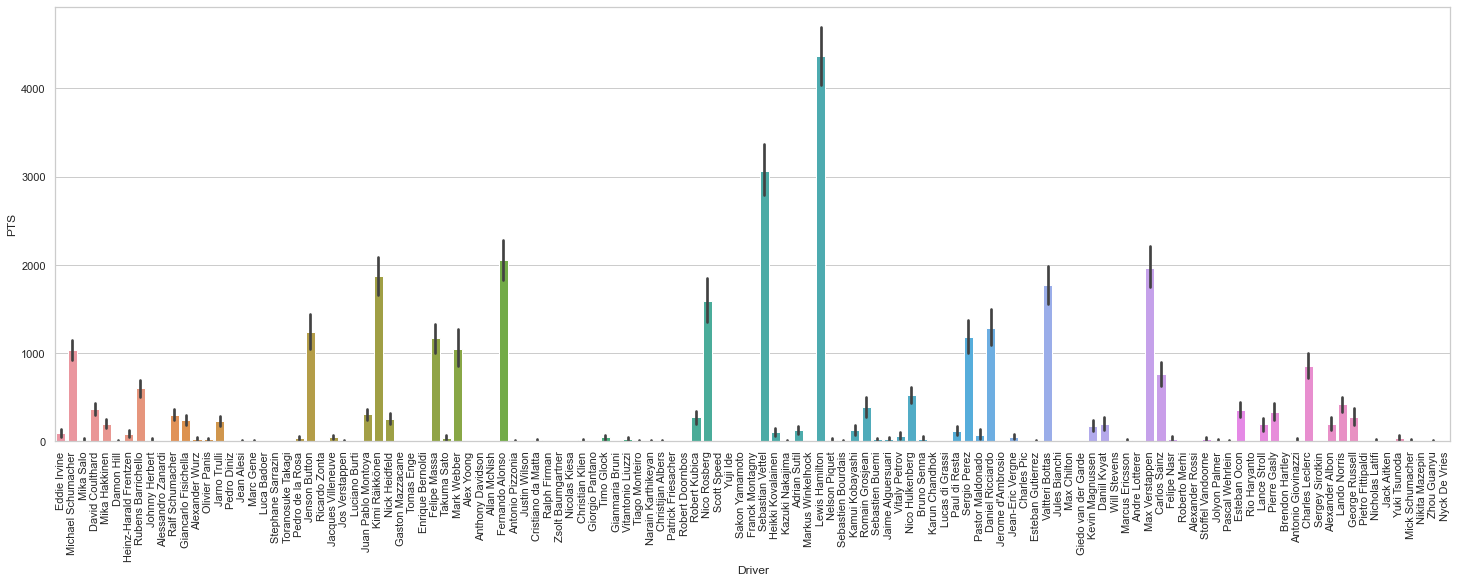

In [30]:
#setting the seaborn theme
sns.set_theme(style="whitegrid")
#bar chart of total points per driver
plt.figure(figsize=(25, 8))  # adjust the figure size
ax = sns.barplot(x="Driver", y="PTS", data=df, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

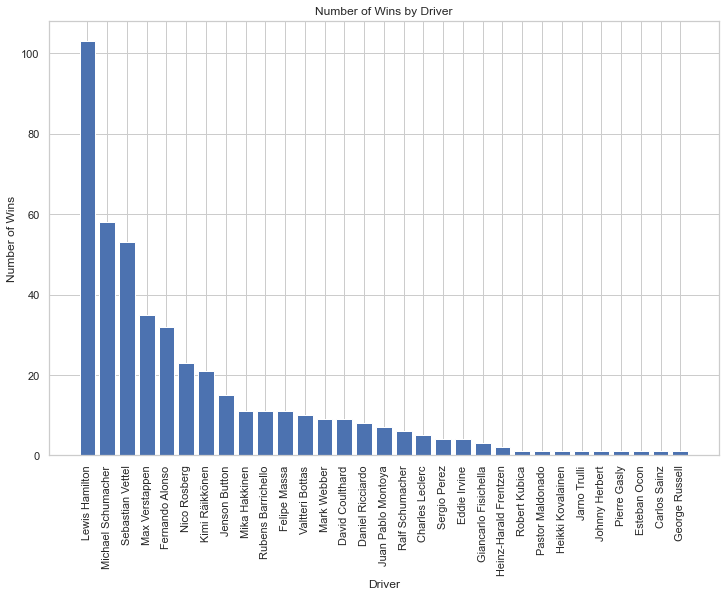

In [31]:
#creating a dataframe with the number of wins for each driver
winners = df[df['Won'] == 1]
win_count = winners['Driver'].value_counts()
driver_wins = pd.DataFrame({'Driver':win_count.index, 'Wins':win_count.values})
driver_wins = driver_wins.sort_values(by='Wins', ascending=False)

#creating a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(np.arange(len(driver_wins)), driver_wins['Wins'], align='center')
ax.set_xticks(np.arange(len(driver_wins)))
ax.set_xticklabels(driver_wins['Driver'], rotation=90)
ax.set_xlabel('Driver')
ax.set_ylabel('Number of Wins')
ax.set_title('Number of Wins by Driver')
plt.show()

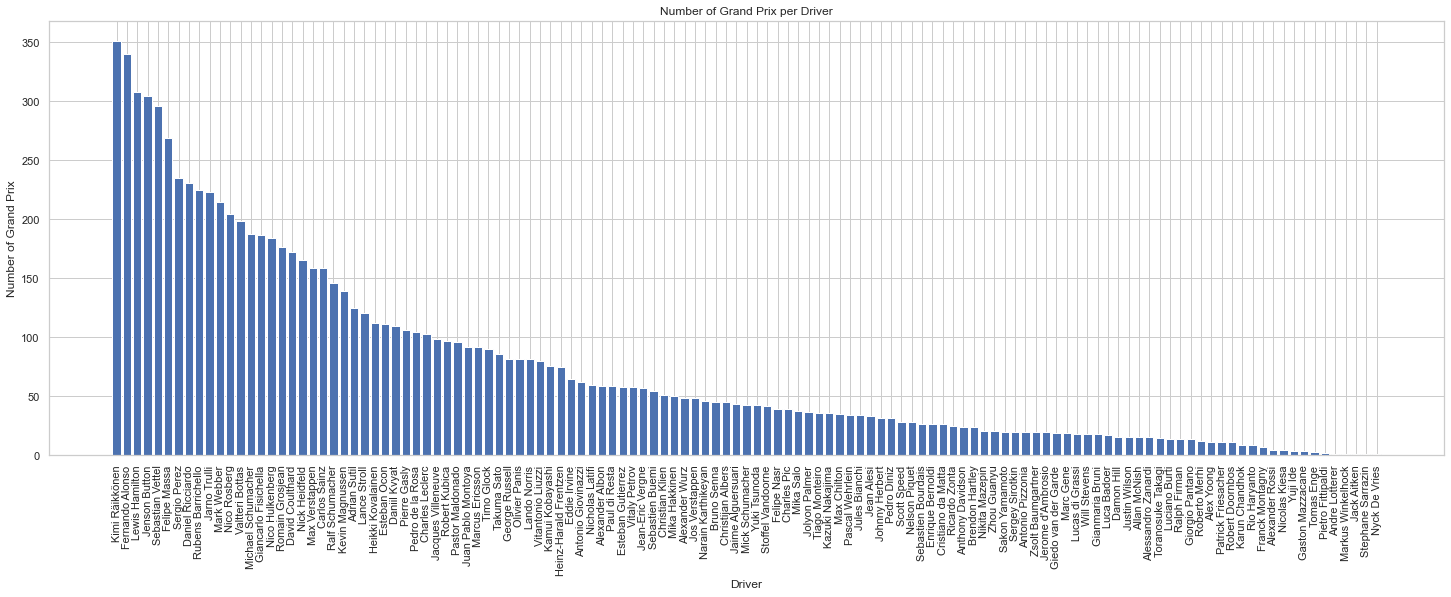

In [32]:
#counting the number of occurrences of each driver in the 'Driver' column
driver_counts = df['Driver'].value_counts()
#creating a bar chart showing the number of Grand Prix each driver has participated in
plt.figure(figsize=(25, 8))
plt.bar(driver_counts.index, driver_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Driver')
plt.ylabel('Number of Grand Prix')
plt.title('Number of Grand Prix per Driver')
plt.show()

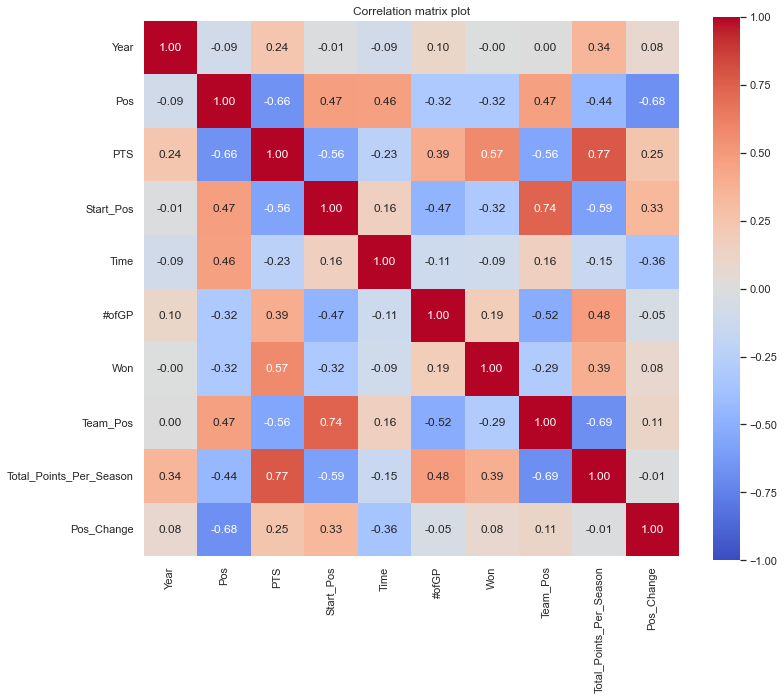

In [33]:
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True, vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title("Correlation matrix plot")
plt.show()

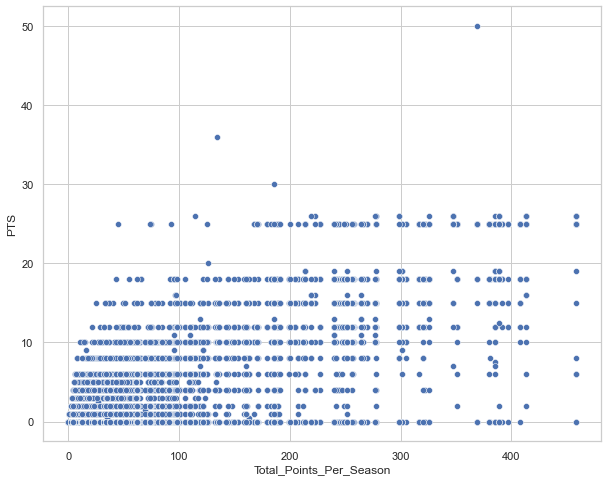

In [34]:
#scatter plot of points in the season and points in the race (PTS)
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Total_Points_Per_Season", y="PTS", data=df)
plt.show()

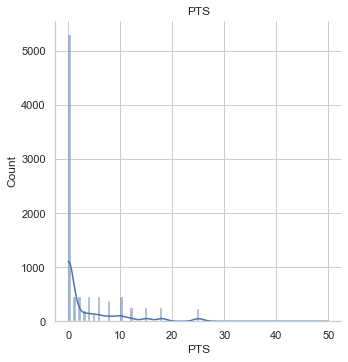

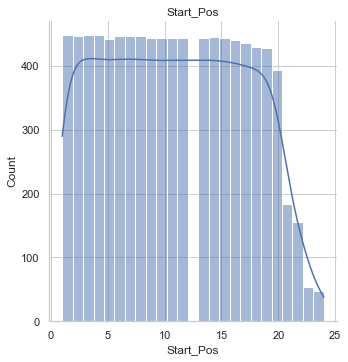

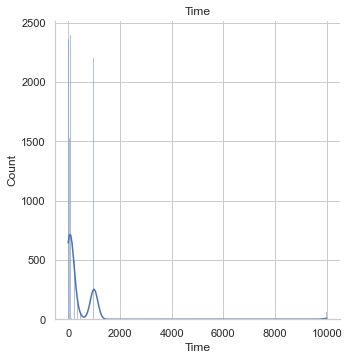

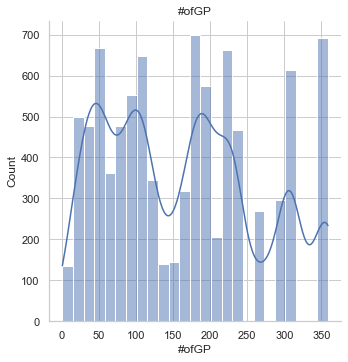

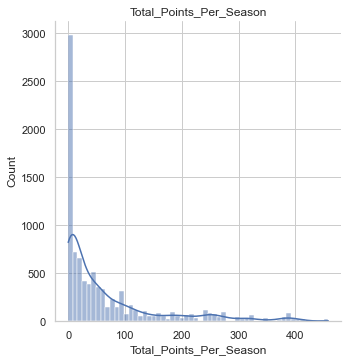

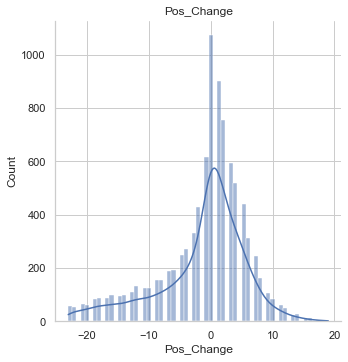

In [35]:
#changing the dataframe so that tit only includes numerical columns
numeric_cols = ['PTS', 'Start_Pos', 'Time', '#ofGP', 'Total_Points_Per_Season', 'Pos_Change']
numeric_df = df[numeric_cols]
#looping through each column and creating distribution plots
for col in numeric_df.columns:
    sns.displot(numeric_df[col], kde=True)
    plt.title(col)
    plt.show()

0        1
7230     1
7227     1
7224     1
7221     1
        ..
7569    25
2669    25
7573    25
7564    25
3818    25
Name: Pos, Length: 9246, dtype: int64


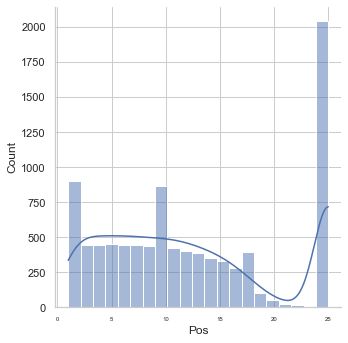

In [36]:
#sorting the position column
df_pos_sorted = df['Pos'].sort_values()
print(df_pos_sorted)
#plotting the position distribution
sns.displot(df_pos_sorted, kde=True)
plt.xticks(fontsize=6)
plt.show()

In [ ]:
#MULTINOMIAL LOGISTIC REGRESSION

In [9]:
#Encoding for MLR
le_driver = LabelEncoder()
df.loc[:, "Driver_Encoded"] = le_driver.fit_transform(df["Driver"])
le_gp = LabelEncoder()
df.loc[:, "GP_Encoded"] = le_gp.fit_transform(df["Grand Prix"])

In [11]:
drivers_2022 = ['Sergio Perez', 'Max Verstappen', 'Charles Leclerc',
                'Carlos Sainz', 'Lewis Hamilton', 'George Russell',
                'Fernando Alonso', 'Esteban Ocon', 'Lando Norris',
                'Daniel Ricciardo', 'Valtteri Bottas', 'Zhou Guanyu',
                'Sebastian Vettel', 'Lance Stroll', 'Nico Hulkenberg',
                'Kevin Magnussen', 'Mick Schumacher', 'Pierre Gasly',
                'Yuki Tsunoda', 'Nicholas Latifi', 'Alexander Albon',
                'Nyck De Vries']

pdata = df[df["Year"] >= 2022] #prediction dataset
df1 = df[df["Year"] < 2022] #train+test dataset

#chaning to numeric and inversing
df1.loc[:, "Start_Pos"] = pd.to_numeric(df1["Start_Pos"]).copy()
df1.loc[:, "Team_Pos"] = pd.to_numeric(df1["Team_Pos"]).copy()
df1.loc[:, "Start_Pos"] = df1["Start_Pos"].max() - df1["Start_Pos"].copy()
df1.loc[:, "Team_Pos"] = df1["Team_Pos"].max() - df1["Team_Pos"].copy()


y = df1["Pos"]
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(["Driver", "Date", "Car", "Time/Retired", "DriverCode", "Grand Prix", "Pos"], axis=1), y, test_size=0.2,random_state=42)

#normalising
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#starting the timer MLR
start_time_mlr = time.time()

#training MLR
model_mlr = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, penalty='l2', C=5)
model_mlr.fit(X_train_scaled, y_train)

#accuracy score training + testing
train_accuracy = accuracy_score(y_train, model_mlr.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, model_mlr.predict(X_test_scaled))
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

#ending the timer
end_time_mlr = time.time()

#elapsed time - model
elapsed_time_mlr = end_time_mlr - start_time_mlr
print("Elapsed time of training the model:", elapsed_time_mlr, "seconds")

#getting the name of the grand prix from the user
grand_prix = input("Enter the name of the grand prix: ")

#starting the timer
start_time = time.time()

selected_race = pdata[(pdata["Grand Prix"] == grand_prix)]

if selected_race.empty:
    print("Sorry, no results found for the given grand prix.")
else:
    #list of drivers participating in the 2022 
    drivers_2022 = [driver for driver in drivers_2022 if driver in selected_race["Driver"].unique()]
    if len(drivers_2022) == 0:
        print("Sorry, no drivers found for the given grand prix and year.")
    else:
        #filtering encoder classes
        le_driver_classes = le_driver.classes_
        filtered_le_driver_classes = np.intersect1d(le_driver_classes, drivers_2022)
        if len(filtered_le_driver_classes) == 0:
            print("Sorry, no drivers found in the training data for the given grand prix and year.")
        else:
            #drivers participating in 2022
            filtered_race = selected_race[selected_race["Driver"].isin(filtered_le_driver_classes)]

            filtered_race.loc[:, "Driver_Encoded"] = le_driver.transform(filtered_race["Driver"]).copy()
            filtered_race.loc[:, "GP_Encoded"] = le_gp.transform(filtered_race["Grand Prix"]).copy()
            filtered_race.loc[:, "Start_Pos"] = pd.to_numeric(filtered_race["Start_Pos"]).copy()
            filtered_race.loc[:, "Team_Pos"] = pd.to_numeric(filtered_race["Team_Pos"]).copy()
            filtered_race.loc[:, "Start_Pos"] = filtered_race["Start_Pos"].max() - filtered_race["Start_Pos"].copy()
            filtered_race.loc[:, "Team_Pos"] = filtered_race["Team_Pos"].max() - filtered_race["Team_Pos"].copy()


            pdata_filtered = filtered_race.drop(["Driver", "Date", "Car", "Time/Retired", "DriverCode", "Grand Prix", "Pos" ], axis=1)
            pdata_scaled = scaler.transform(pdata_filtered)
            # predictions 
            predictions = model_mlr.predict(pdata_scaled)

            # Driver
            driver_probabilities = {}
            for i, driver_index in enumerate(range(len(filtered_le_driver_classes))):
                if driver_index >= len(filtered_le_driver_classes):
                    continue  # skipping if the driver index is out of bounds
                driver = filtered_le_driver_classes[driver_index]
                prediction = predictions[i]
                driver_probabilities[driver] = prediction

            # sorting the drivers
            sorted_drivers = sorted(driver_probabilities, key=lambda x: driver_probabilities[x], reverse=True)
            print("Predicted positions for the", grand_prix, "Grand Prix in 2022:")
            for position, driver in enumerate(sorted_drivers, start=1):
                print("Position:", position, "Driver:", driver)
                
                
#classification report
y_pred_test = model_mlr.predict(X_test_scaled)
classification_report_test = classification_report(y_test, y_pred_test, zero_division = 1)
print("Classification Report (Test Data):\n", classification_report_test)  

#elapsed time - predictions
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Train Accuracy: 0.779228149829739
Test Accuracy: 0.7360953461975028
Elapsed time of training the model: 4.418705940246582 seconds
Enter the name of the grand prix: Saudi Arabia
Predicted positions for the Saudi Arabia Grand Prix in 2022:
Position: 1 Driver: George Russell
Position: 2 Driver: Lando Norris
Position: 3 Driver: Lewis Hamilton
Position: 4 Driver: Valtteri Bottas
Position: 5 Driver: Yuki Tsunoda
Position: 6 Driver: Zhou Guanyu
Position: 7 Driver: Nicholas Latifi
Position: 8 Driver: Nico Hulkenberg
Position: 9 Driver: Kevin Magnussen
Position: 10 Driver: Lance Stroll
Position: 11 Driver: Max Verstappen
Position: 12 Driver: Pierre Gasly
Position: 13 Driver: Sergio Perez
Position: 14 Driver: Esteban Ocon
Position: 15 Driver: Charles Leclerc
Position: 16 Driver: Daniel Ricciardo
Position: 17 Driver: Alexander Albon
Position: 18 Driver: Carlos Sainz
Position: 19 Driver: Fernando Alonso
Classification Report (Test Data):
               precision    recall  f1-score   support

    

In [32]:
#getting the name of the grand prix from the user
grand_prix = input("Enter the name of the grand prix: ")
#starting the timer
start_time = time.time()

selected_race = pdata[(pdata["Grand Prix"] == grand_prix)]

if selected_race.empty:
    print("Sorry, no results found for the given grand prix.")
else:
    #list of drivers participating in the 2022 
    drivers_2022 = [driver for driver in drivers_2022 if driver in selected_race["Driver"].unique()]
    if len(drivers_2022) == 0:
        print("Sorry, no drivers found for the given grand prix and year.")
    else:
        #filtering encoder classes
        le_driver_classes = le_driver.classes_
        filtered_le_driver_classes = np.intersect1d(le_driver_classes, drivers_2022)
        if len(filtered_le_driver_classes) == 0:
            print("Sorry, no drivers found in the training data for the given grand prix and year.")
        else:
            #drivers participating in 2022
            filtered_race = selected_race[selected_race["Driver"].isin(filtered_le_driver_classes)]

            filtered_race.loc[:, "Driver_Encoded"] = le_driver.transform(filtered_race["Driver"]).copy()
            filtered_race.loc[:, "GP_Encoded"] = le_gp.transform(filtered_race["Grand Prix"]).copy()
            filtered_race.loc[:, "Start_Pos"] = pd.to_numeric(filtered_race["Start_Pos"]).copy()
            filtered_race.loc[:, "Team_Pos"] = pd.to_numeric(filtered_race["Team_Pos"]).copy()
            filtered_race.loc[:, "Start_Pos"] = filtered_race["Start_Pos"].max() - filtered_race["Start_Pos"].copy()
            filtered_race.loc[:, "Team_Pos"] = filtered_race["Team_Pos"].max() - filtered_race["Team_Pos"].copy()


            pdata_filtered = filtered_race.drop(["Driver", "Date", "Car", "Time/Retired", "DriverCode", "Grand Prix", "Pos" ], axis=1)
            pdata_scaled = scaler.transform(pdata_filtered)
            # predictions 
            predictions = model_mlr.predict(pdata_scaled)

            # Driver
            driver_probabilities = {}
            for i, driver_index in enumerate(range(len(filtered_le_driver_classes))):
                if driver_index >= len(filtered_le_driver_classes):
                    continue  # skipping if the driver index is out of bounds
                driver = filtered_le_driver_classes[driver_index]
                prediction = predictions[i]
                driver_probabilities[driver] = prediction

            # sorting the drivers
            sorted_drivers = sorted(driver_probabilities, key=lambda x: driver_probabilities[x], reverse=True)
            print("Predicted positions for the", grand_prix, "Grand Prix in 2022:")
            for position, driver in enumerate(sorted_drivers, start=1):
                print("Position:", position, "Driver:", driver)
                
                
#classification report
y_pred_test = model_mlr.predict(X_test_scaled)
classification_report_test = classification_report(y_test, y_pred_test, zero_division = 1)
print("Classification Report (Test Data):\n", classification_report_test)  

#elapsed time - predictions
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Enter the name of the grand prix: Abu Dhabi
Predicted positions for the Abu Dhabi Grand Prix in 2022:
Position: 1 Driver: Fernando Alonso
Position: 2 Driver: Kevin Magnussen
Position: 3 Driver: Nicholas Latifi
Position: 4 Driver: Yuki Tsunoda
Position: 5 Driver: Lance Stroll
Position: 6 Driver: Max Verstappen
Position: 7 Driver: Sergio Perez
Position: 8 Driver: Lewis Hamilton
Position: 9 Driver: Daniel Ricciardo
Position: 10 Driver: Carlos Sainz
Position: 11 Driver: Charles Leclerc
Position: 12 Driver: Esteban Ocon
Position: 13 Driver: George Russell
Position: 14 Driver: Lando Norris
Classification Report (Test Data):
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        86
           2       0.97      1.00      0.99        77
           3       0.83      0.84      0.83        81
           4       0.76      0.79      0.77        82
           5       0.65      0.70      0.67        69
           6       0.57      0.44      0.50     

/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
#ORDINAL LOGISTIC REGRESSION

In [39]:
#working on the copy
df_copy = df.copy()

#encoding columns for ordinal
le = LabelEncoder()
driver_encoded = df_copy["Driver_Encoded"] = le.fit_transform(df_copy["Driver"])
car_encoded = df_copy["Car_Encoded"] = le.fit_transform(df_copy["Car"])
gp_encoded = df_copy["GP_Encoded"] = le.fit_transform(df_copy["Grand Prix"])

#filtering the data based on the year
pdata = df_copy[df_copy["Year"] >= 2022]
df1 = df_copy[df_copy["Year"] < 2022]

#splitting the data into train and test sets with 80/20 proportion
train_df, test_df = train_test_split(df_copy, test_size=0.2, random_state=42)

#Ordered logit model
mod_prob = OrderedModel(train_df['Pos'],
                        train_df[['Year','PTS', 'Start_Pos', 'Time', 'Pos_Change', 'Total_Points_Per_Season', 'Team_Pos', 'Driver_Encoded','Car_Encoded','GP_Encoded']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

#predicting the classes for the training set
y_train_pred_prob = res_log.predict(train_df[['Year','PTS', 'Start_Pos', 'Time', 'Pos_Change', 'Total_Points_Per_Season', 'Team_Pos', 'Driver_Encoded','Car_Encoded','GP_Encoded']])

#converting the predicted probabilities to class labels
y_train_pred_labels = y_train_pred_prob.to_numpy().argmax(axis=1) + 1

#calculating the accuracy score for the training set
accuracy_train = accuracy_score(train_df['Pos'], y_train_pred_labels)

#the accuracy score for the training set
print("Training set accuracy: ", accuracy_train)

#predicting the classes for the test set
y_test_pred_prob = res_log.predict(test_df[['Year','PTS', 'Start_Pos', 'Time', 'Pos_Change', 'Total_Points_Per_Season', 'Team_Pos', 'Driver_Encoded','Car_Encoded','GP_Encoded']])

#converting the predicted probabilities to class labels
y_test_pred_labels = y_test_pred_prob.to_numpy().argmax(axis=1) + 1

#calculating the accuracy score for the test set
accuracy_test = accuracy_score(test_df['Pos'], y_test_pred_labels)

#the accuracy score for the test set
print("Test set accuracy: ", accuracy_test)

#input
gp_input = input("Enter Grand Prix name: ")
#gp_input = "Austria"
year_input = 2022
#starting the timer for the prediction
start_time_pred = time.time()
    
gp_df = pdata[pdata['Grand Prix'] == gp_input]
yr_df = gp_df[gp_df['Year'] == int(year_input)]

if yr_df.empty:
    print("No drivers found for the specified Grand Prix and year.")
else:
    #getting the driver data for the specified columns
    driver_data = yr_df[['Driver','Year','PTS', 'Start_Pos', 'Time', 'Pos_Change', 'Total_Points_Per_Season', 'Team_Pos', 'Driver_Encoded','Car_Encoded','GP_Encoded']]
    
    #converting the driver data to a numpy array
    driver_data = driver_data.to_numpy()

    #initializing the StandardScaler
    scaler = StandardScaler()

    #scaling the driver data
    driver_data_scaled = scaler.fit_transform(driver_data[:,1:])

    #predicting the position probabilities for the drivers
    driver_pos_probs = res_log.predict(driver_data_scaled)
    
    #accessing the probabilities of being 1st
    driver_test_pred_labels = driver_pos_probs[:,0]
    
    #creating the dataframe for predicted and actual class labels
    driver_pred_df = pd.DataFrame({'Predicted': driver_test_pred_labels}, index=yr_df['Pos'].index)

    #adding the 'Actual' column based on yr_df['Pos']
    driver_pred_df['Actual'] = yr_df['Pos']
    #sorting indices in "Predicted" column
    sorted_indices = np.argsort(-driver_pred_df['Predicted'])
    #creating an empty array for class labels
    class_labels = np.empty_like(sorted_indices)

    #creating right labels for "predicted" column
    for i, idx in enumerate(sorted_indices):
        class_labels[idx] = i + 1

    driver_pred_df['Predicted'] = class_labels
    #print(driver_pred_df)
    
    #calculating the accuracy, precision, recall, and f1 score
    driver_accuracy = accuracy_score(driver_pred_df['Actual'], driver_pred_df['Predicted'])
    precision = precision_score(driver_pred_df['Actual'], driver_pred_df['Predicted'], average='weighted', zero_division=1)
    recall = recall_score(driver_pred_df['Actual'], driver_pred_df['Predicted'], average='weighted', zero_division=1)
    f1 = f1_score(driver_pred_df['Actual'], driver_pred_df['Predicted'], average='weighted')

    #finding the index of a driver with the highest probability of finishing in position 1
    driver_pos_1 = driver_pred_df[driver_pred_df['Predicted'] == 1].index[0]
    #finding the driver's name based on the index
    driver_pos_1_name = yr_df.loc[driver_pos_1, 'Driver'] 

    #print(driver_pos_1_name)
    #print(yr_df.loc[driver_pos_1])
    
    print("The driver most likely to finish in position 1 for the {} Grand Prix on {} is: {}".format(gp_input, year_input, driver_pos_1_name))
    print("Accuracy: ", driver_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    
    #accuracy report for the ordinal logistic regression prediction
    print(classification_report(driver_pred_df['Actual'], driver_pred_df['Predicted'], zero_division = 1))
    
    #ending the timer
    end_time_pred = time.time()
    
    #calculating the elapsed time in seconds
    elapsed_time_pred = end_time_pred - start_time_pred
    print("Elapsed time:", elapsed_time_pred, "seconds")

         Current function value: 0.000001
         Iterations: 500
         Function evaluations: 516
         Gradient evaluations: 516


/Users/AnhDungNguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training set accuracy:  0.7817739318550568
Test set accuracy:  0.7691891891891892
The driver most likely to finish in position 1 for the Bahrain Grand Prix on 2022 is: Charles Leclerc
Accuracy:  0.65
Precision: 0.7
Recall: 0.65
F1-Score: 0.65
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1


In [ ]:
#GRADIENT BOOSTING

In [40]:
#creating a copy of df, so that we can work on the gradient boosting
df2 = df.copy()

#checking how many unique values per column we have so that we can apply label encoding
print(len(df2['Driver'].unique()))
print(len(df2['Grand Prix'].unique()))
print(len(df2['Car'].unique()))

#applyimg the label encoding via :abelEncoded (might not be the best option, but we wanted to avoid creating about 200 binary columns)
le = LabelEncoder()
df2['DriverCode'] = le.fit_transform(df2['Driver'])
df2['GP_Code'] = le.fit_transform(df2['Grand Prix'])
df2['Car_Code'] = le.fit_transform(df2['Car'])

#spliting for train and predictions
df_2022 = df2[df2['Year'] == 2022].copy()
df3 = df2[df2['Year'] < 2022].copy()

123
38
73


In [41]:
df_2022.head()

,Date,Driver,Grand Prix,Year,Pos,Time/Retired,PTS,DriverCode,Car,Start_Pos,Time,#ofGP,Won,Team_Pos,Total_Points_Per_Season,Pos_Change,Driver_Encoded,GP_Encoded,GP_Code,Car_Code
8810,20 Nov 2022,Sergio Perez,Abu Dhabi,2022,3,+10.093s,15.0,107,Red Bull Racing RBPT,2,10.093,237,0,1,301.0,-1,107,1,1,48
8811,10 Apr 2022,Sergio Perez,Australia,2022,2,+20.524s,18.0,107,Red Bull Racing RBPT,3,20.524,237,0,1,301.0,1,107,2,2,48
8812,10 Jul 2022,Sergio Perez,Austria,2022,25,DNF,0.0,107,Red Bull Racing RBPT,5,1000.000,237,0,1,301.0,-19,107,3,3,48
8813,12 Jun 2022,Sergio Perez,Azerbaijan,2022,2,+20.823s,19.0,107,Red Bull Racing RBPT,2,20.823,237,0,1,301.0,0,107,4,4,48
8814,20 Mar 2022,Sergio Perez,Bahrain,2022,18,DNF,0.0,107,Red Bull Racing RBPT,4,1000.000,237,0,1,301.0,-14,107,5,5,48


In [43]:
#separatting features and target (X and Y variables)
X = df3[['Year', 'PTS', 'DriverCode', 'Start_Pos', '#ofGP', 'Team_Pos', 'Total_Points_Per_Season', 'Pos_Change', 'GP_Code', 'Car_Code']]
y = df3['Pos']

#splitting the data into train, validation, and test sets (70, 15 and 15)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

#defining the model
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

#fitting the model to the training data and measure the training time

start_time1 = time.time()
model1.fit(X_train, y_train)
end_time1 = time.time()

training_time1 = end_time1 - start_time1
print('Training time:', training_time1)

#evaluating the model on the validation set
val_acc = model1.score(X_val, y_val)
print('Validation accuracy:', val_acc)

#evaluating the model on the test set
test_acc = model1.score(X_test, y_test)
print('Test accuracy:', test_acc)

#making predictions on the validation set
y_val_pred_1 = model1.predict(X_val)

#printing classification report
print(classification_report(y_val, y_val_pred_1, zero_division = 1))

# Generate predictions on the test set and the time
start_time2 = time.time()
y_pred_1 = model1.predict(X_test)
end_time2 = time.time()

elapsed_time1 = end_time2 - start_time2
print("Elapsed time:", elapsed_time1, "seconds")

#printing classification report
print(classification_report(y_test, y_pred_1, zero_division = 1))

df_2022_pred = df_2022[['Year', 'PTS', 'DriverCode', 'Start_Pos', '#ofGP', 'Team_Pos', 'Total_Points_Per_Season', 'Pos_Change', 'GP_Code', 'Car_Code']]
unique_races_2022 = df_2022[['Grand Prix', 'GP_Code']].drop_duplicates()

#making predictions on the new dataset
predictions1 = model1.predict(df_2022_pred)

#printing the predictions
print(predictions1)
print(np.unique(predictions1))

corrected_predictions = {}

#Iterate over each race
for race in df_2022_pred['GP_Code'].unique():
    #Get the predictions for the current race
    race_predictions = predictions1[df_2022_pred['Year'] == 2022][df_2022_pred['GP_Code'] == race]

    #Print the predictions for the current race
    print(f"Race Code: {race}")
    print(f"All Predicted Positions: {race_predictions}")
    
#Sort the predictions for each race with drivers names and position in ascending order 

#Create a dictionary to store the race places
race_places = {}

#Iterate over each race in df_2022
for index, row in df_2022.iterrows():
    race_places[row['GP_Code']] = row['Grand Prix']

#Create a dictionary to store the driver names
driver_names = {}

#Iterate over each driver in df_2022
for index, row in df_2022.iterrows():
    driver_names[row['DriverCode']] = row['Driver']

#Iterate over each race
for race in df_2022_pred['GP_Code'].unique():
    #Get the predictions for the current race
    race_data = df_2022_pred[df_2022_pred['GP_Code'] == race]
    race_predictions = predictions1[df_2022_pred['Year'] == 2022][df_2022_pred['GP_Code'] == race]
    driver_codes = race_data['DriverCode']

    #Sort the predictions by position
    sorted_predictions = sorted(zip(driver_codes, race_predictions), key=lambda x: x[1])

    #Print the predictions for the current race
    print(f"Race Code: {race}, Race Place: {race_places[race]}")
    for position, (driver, position) in enumerate(sorted_predictions, start=1):
        driver_name = driver_names[driver]
        print(f"Position: {position}, Driver: {driver_name}, Driver Code: {driver}")
    print()



Training time: 18.167057991027832
Validation accuracy: 0.878122634367903
Test accuracy: 0.8524962178517398
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        62
           6       0.99      0.99      0.99        72
           7       0.93      0.93      0.93        76
           8       0.91      0.87      0.89        70
           9       0.83      0.88      0.85        60
          10       0.90      0.81      0.85        64
          11       0.71      0.82      0.76        66
          12       0.57      0.63      0.60        51
          13       0.57      0.57      0.57        47
          14       0.71      0.53      0.61        45
          15       0.54      0.73      0.62        37
          16       0.74     

In [ ]:
#XGBOOST

In [44]:
#transform data 
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dval = xgb.DMatrix(X_val, label=y_val)

num_classes = y.nunique() + 1

#Define the XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes, 
    'max_depth': 3,
    'eta': 0.7,
    'eval_metric': 'mlogloss'}

#Train the XGBoost model
num_rounds = 10
watchlist = [(dtrain, 'train'), (dval, 'validation')]

#fitting the model to the training data and measure the training time
start_time3 = time.time()
model2 = xgb.train(params, dtrain, num_rounds, evals=watchlist)
end_time3 = time.time()

training_time2 = end_time3 - start_time3
print('Training time:', training_time2)

#Generate predictions on the test set and the time
start_time4 = time.time()
predictions2 = model2.predict(dtest)
end_time4 = time.time()

elapsed_time2 = end_time4 - start_time4
print("Elapsed time:", elapsed_time2, "seconds")

#Evaluate the model
accuracy2 = sum(predictions2 == y_test) / len(y_test)
print(f'Accuracy on test set: {accuracy2}')

print(classification_report(y_test, predictions2, zero_division = 1))

#making predictions on the new dataset

df_2022_pred_0 = xgb.DMatrix(df_2022_pred)
predictions2 = model2.predict(df_2022_pred_0)

#printing the predictions
print(predictions2)
print(np.unique(predictions2))


corrected_predictions2 = {}

#Iterate over each race
for race in df_2022_pred['GP_Code'].unique():
    #Get the predictions for the current race
    race_predictions2 = predictions2[df_2022_pred['Year'] == 2022][df_2022_pred['GP_Code'] == race]

    #Print the predictions for the current race
    print(f"Race Code: {race}")
    print(f"All Predicted Positions: {race_predictions2}")
    print()

[0]	train-mlogloss:1.46930	validation-mlogloss:1.47061
[1]	train-mlogloss:1.21108	validation-mlogloss:1.31887
[2]	train-mlogloss:0.81730	validation-mlogloss:0.90653
[3]	train-mlogloss:0.71904	validation-mlogloss:0.80778
[4]	train-mlogloss:0.64281	validation-mlogloss:0.72978
[5]	train-mlogloss:0.59293	validation-mlogloss:0.68589
[6]	train-mlogloss:0.54551	validation-mlogloss:0.64763
[7]	train-mlogloss:0.51386	validation-mlogloss:0.62271
[8]	train-mlogloss:0.48200	validation-mlogloss:0.59640
[9]	train-mlogloss:0.45771	validation-mlogloss:0.57874
Training time: 0.4288508892059326
Elapsed time: 0.0038299560546875 seconds
Accuracy on test set: 0.8116490166414524
              precision    recall  f1-score   support

           1       0.99      0.99      0.99        71
           2       0.99      1.00      0.99        71
           3       1.00      0.97      0.99        70
           4       0.95      0.98      0.96        54
           5       1.00      1.00      1.00        44
         

In [45]:
#Sort the predictions for each race with drivers names and position in ascending order 

#Create a dictionary to store the race places
race_places = {}

#Iterate over each race in df_2022
for index, row in df_2022.iterrows():
    race_places[row['GP_Code']] = row['Grand Prix']

#Create a dictionary to store the driver names
driver_names = {}

#Iterate over each driver in df_2022
for index, row in df_2022.iterrows():
    driver_names[row['DriverCode']] = row['Driver']

#Iterate over each race
for race in df_2022_pred['GP_Code'].unique():
    #Get the predictions for the current race
    race_data = df_2022_pred[df_2022_pred['GP_Code'] == race]
    race_predictions = predictions2[df_2022_pred['Year'] == 2022][df_2022_pred['GP_Code'] == race]
    driver_codes = race_data['DriverCode']

    #Sort the predictions by position
    sorted_predictions = sorted(zip(driver_codes, race_predictions), key=lambda x: x[1])

    #Print the predictions for the current race
    print(f"Race Code: {race}, Race Place: {race_places[race]}")
    for position, (driver, position) in enumerate(sorted_predictions, start=1):
        driver_name = driver_names[driver]
        print(f"Position: {position}, Driver: {driver_name}, Driver Code: {driver}")
    print()

Race Code: 1, Race Place: Abu Dhabi
Position: 1.0, Driver: Max Verstappen, Driver Code: 69
Position: 2.0, Driver: Charles Leclerc, Driver Code: 14
Position: 2.0, Driver: Lando Norris, Driver Code: 59
Position: 3.0, Driver: Sergio Perez, Driver Code: 107
Position: 4.0, Driver: Carlos Sainz, Driver Code: 13
Position: 5.0, Driver: George Russell, Driver Code: 32
Position: 7.0, Driver: Esteban Ocon, Driver Code: 26
Position: 8.0, Driver: Lance Stroll, Driver Code: 58
Position: 9.0, Driver: Daniel Ricciardo, Driver Code: 20
Position: 10.0, Driver: Sebastian Vettel, Driver Code: 103
Position: 11.0, Driver: Zhou Guanyu, Driver Code: 121
Position: 11.0, Driver: Yuki Tsunoda, Driver Code: 120
Position: 14.0, Driver: Alexander Albon, Driver Code: 3
Position: 15.0, Driver: Lewis Hamilton, Driver Code: 60
Position: 15.0, Driver: Mick Schumacher, Driver Code: 71
Position: 16.0, Driver: Valtteri Bottas, Driver Code: 115
Position: 16.0, Driver: Pierre Gasly, Driver Code: 90
Position: 17.0, Driver: Ke